In [1]:
%run project_functions.ipynb

Using TensorFlow backend.


In [2]:
file_name = 'FB.txt'
csv_name = 'FB.csv'

In [3]:
#Features
company = stock_twits_text_parser(file_name)
company_metrics = stock_twits_metrics(company, 3, file_name)

#Labels
company_return = return_over_period_T(csv_name,3)

#Cleaned Data
agg_data = feature_selector(company_metrics, company_return, 'close_return', 25, 1000)
company_data = split_data(agg_data, 0.7, 'all', 'close_return', 'bin')

#Split
X_train = company_data['X_train']
Y_train = company_data['Y_train']
X_test = company_data['X_test']
Y_test = company_data['Y_test']

In [12]:
#Build Model
model = build_neural_network_cf(1003)

#Fit Model
model.fit(X_train, Y_train, epochs=100, batch_size=10)

#Predict
pred_train = model.predict_classes(X_train)
pred_test = model.predict_classes(X_test)

Epoch 1/100
238/238 [==============================] - 0s 2ms/step - loss: 0.6774 - accuracy: 0.5924
Epoch 2/100
238/238 [==============================] - 0s 314us/step - loss: 0.6640 - accuracy: 0.5756
Epoch 3/100
238/238 [==============================] - 0s 344us/step - loss: 0.6420 - accuracy: 0.7269
Epoch 4/100
238/238 [==============================] - 0s 394us/step - loss: 0.6072 - accuracy: 0.7185
Epoch 5/100
238/238 [==============================] - 0s 293us/step - loss: 0.5336 - accuracy: 0.7983
Epoch 6/100
238/238 [==============================] - 0s 515us/step - loss: 0.4334 - accuracy: 0.8739
Epoch 7/100
238/238 [==============================] - 0s 272us/step - loss: 0.3498 - accuracy: 0.9202
Epoch 8/100
238/238 [==============================] - 0s 268us/step - loss: 0.2215 - accuracy: 0.9706
Epoch 9/100
238/238 [==============================] - 0s 302us/step - loss: 0.1505 - accuracy: 0.9706
Epoch 10/100
238/238 [==============================] - 0s 377us/step - los

238/238 [==============================] - 0s 327us/step - loss: 1.5294e-04 - accuracy: 1.0000
Epoch 78/100
238/238 [==============================] - 0s 272us/step - loss: 1.4772e-04 - accuracy: 1.0000
Epoch 79/100
238/238 [==============================] - 0s 344us/step - loss: 1.4507e-04 - accuracy: 1.0000
Epoch 80/100
238/238 [==============================] - 0s 406us/step - loss: 1.4083e-04 - accuracy: 1.0000
Epoch 81/100
238/238 [==============================] - 0s 302us/step - loss: 1.3447e-04 - accuracy: 1.0000
Epoch 82/100
238/238 [==============================] - 0s 277us/step - loss: 1.3156e-04 - accuracy: 1.0000
Epoch 83/100
238/238 [==============================] - 0s 402us/step - loss: 1.2770e-04 - accuracy: 1.0000
Epoch 84/100
238/238 [==============================] - 0s 331us/step - loss: 1.2374e-04 - accuracy: 1.0000
Epoch 85/100
238/238 [==============================] - 0s 281us/step - loss: 1.1991e-04 - accuracy: 1.0000
Epoch 86/100
238/238 [===================

In [6]:
#Generate Confusion Matrices
confusion_train = confusion_matrix(Y_train, pred_train)
confusion_test = confusion_matrix(Y_test, pred_test)

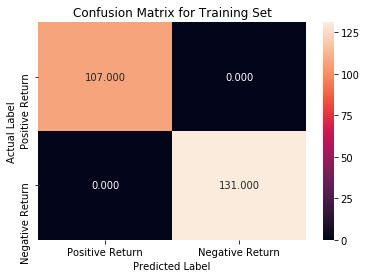

In [7]:
#Plot Confusion Matrix for Training Data
plot_confusion_matrix(confusion_train, "Training")

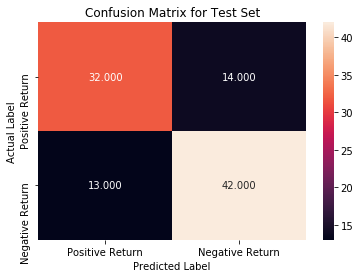

In [8]:
#Plot Confusion Matrix for Test Data
plot_confusion_matrix(confusion_test, "Test")

In [9]:
#Calculate Metrics
table = create_metrics_table(Y_train, pred_train, Y_test, pred_test)
table

,Recall,Precision,F1 Score,Accuracy
Dataset,,,,
Training,1.000000,1.00,1.000000,1.000000
Test,0.763636,0.75,0.756757,0.732673


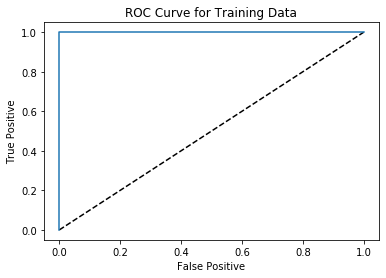

In [10]:
#Generate ROC Curves for Training
pred_train_prob = model.predict(X_train)
FPR_train, TPR_train, Threshold_train = roc_curve(Y_train, pred_train_prob)

#Plot ROC Curve for Training Data
plot_ROC_curve(FPR_train, TPR_train, "Training")

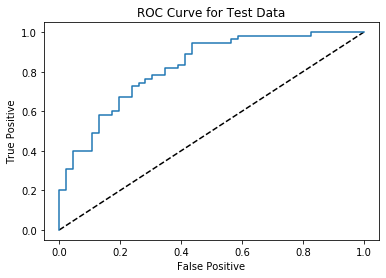

In [11]:
#Generate ROC Curves for Test
pred_test_prob = model.predict(X_test)
FPR_test, TPR_test, Threshold_test = roc_curve(Y_test, pred_test_prob)

#Plot ROC Curve for Training Data
plot_ROC_curve(FPR_test, TPR_test, "Test")